In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
Base = automap_base()

In [6]:
# Reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Connect to database through session
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Get latest date in dataset
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0, 0.5, 'mm')

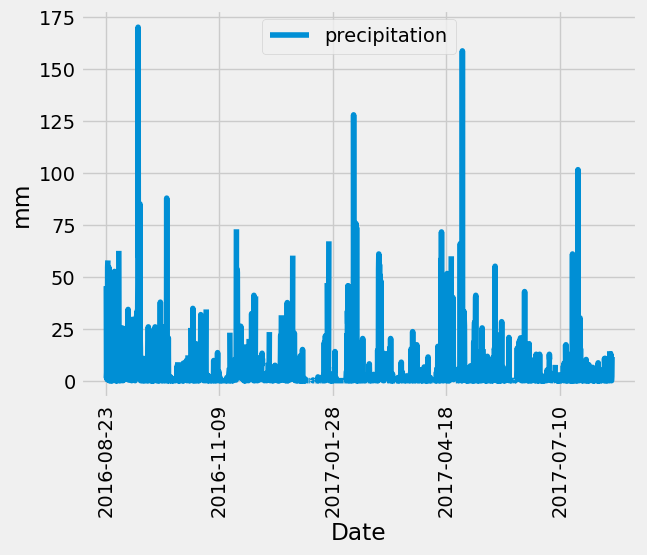

In [24]:
# Calculate date one year from last date in dataset
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query_data_rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(query_data_rain, columns=["Date", "precipitation"])

# Sort the dataframe by date
rain_df_sorted = rain_df.sort_values(by="Date")

# #Set Date as the index
rain_df_sorted.set_index("Date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
pd.DataFrame(rain_df_sorted).plot(rot=90)
plt.ylabel("mm")

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df_sorted.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
test_query = session.query(func.count(func.distinct(Measurement.station))).all()
test_query

[(9,)]

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.tobs,)).\
                group_by(Measurement.station).order_by(func.count( Measurement.tobs).desc()).all()

active_station      

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

The station with the greatest number of observations is USC00519281.

In [28]:
# Using the most active station id from the previous query, calculate the lowest, 
# highest, and average temperature.
sel = [Measurement.station,
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]

top_station_temps = session.query(*sel).filter(Measurement.station == 'USC00519281').all()

top_station_temps

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

Text(0.5, 0, 'Temperature')

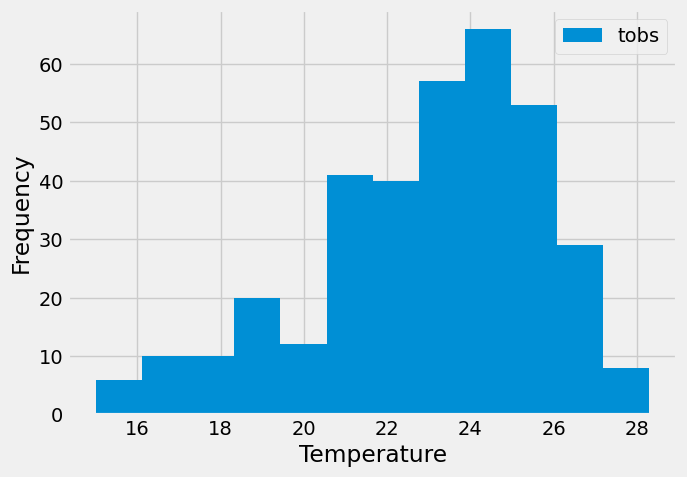

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
year_station_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_ago).all()

# Plot the results as a histogram
pd.DataFrame(year_station_data).plot.hist(bins=12, figsize=(7,5))
plt.xlabel("Temperature")

# Close Session

In [30]:
# Close Session
session.close()